In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [3]:
df3 = pd.read_csv('C:\Sem7\Final Year Project\DATASETS\Reduced_Cleaned_Reviews_laptops.csv')

In [4]:
df3.head(3)

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,similar_item,date,price,review_text,rating_class,clean_text,year,token,review_length,review_length_bin
0,5,True,A36O9HQS83TUX6,1254875778,Rafael Antonio herrera,1412985600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Five Stars excellent salesman problem solved,good,five star excellent salesman problem solve,2014,"['five', 'star', 'excellent', 'salesman', 'pro...",6,"(0, 100]"
1,5,True,A358J4WU5B0Y9Q,1254875778,G4M,1409184000,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"Great RAM, Got them to be used with SuperMicro...",good,great ram get use supermicro receive time grea...,2014,"['great', 'ram', 'get', 'use', 'supermicro', '...",33,"(0, 100]"
2,5,True,A1QSBRR1IFFSD0,1254875778,Tech nerd,1388102400,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Works perfectly. No issues here. Used this RAM...,good,work perfectly no issue use ram double current...,2013,"['work', 'perfectly', 'no', 'issue', 'use', 'r...",26,"(0, 100]"


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10961 entries, 0 to 10960
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             10961 non-null  int64 
 1   verified           10961 non-null  bool  
 2   reviewerID         10961 non-null  object
 3   asin               10961 non-null  object
 4   reviewerName       10959 non-null  object
 5   unixReviewTime     10961 non-null  int64 
 6   category           10961 non-null  object
 7   description        10961 non-null  object
 8   title              10961 non-null  object
 9   also_buy           10961 non-null  object
 10  brand              10949 non-null  object
 11  feature            10961 non-null  object
 12  rank               10961 non-null  object
 13  also_view          10961 non-null  object
 14  main_cat           10961 non-null  object
 15  similar_item       8180 non-null   object
 16  date               10366 non-null  objec

In [7]:
df4 = df3.drop(['Rating','reviewerName','unixReviewTime','verified','description','category','title','price','also_view','brand','review_length','review_length_bin','main_cat','price','feature','rank','date','similar_item'], axis=1)


In [8]:
df4=df4.dropna()

In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10959 entries, 0 to 10960
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewerID    10959 non-null  object
 1   asin          10959 non-null  object
 2   also_buy      10959 non-null  object
 3   review_text   10959 non-null  object
 4   rating_class  10959 non-null  object
 5   clean_text    10959 non-null  object
 6   year          10959 non-null  int64 
 7   token         10959 non-null  object
dtypes: int64(1), object(7)
memory usage: 770.6+ KB


In [10]:
df4['rating_class'] = df4['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [11]:
X = df4['clean_text']
y = df4['rating_class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(8219,)
Test Set Shape		:(2740,)


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [15]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [16]:
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [17]:
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 9756


In [18]:
vocab = count_vect.get_feature_names()

In [19]:
pd.DataFrame(count_vect_train, columns = vocab).head()

,_very_,aaa,aaaaa,ab,abc,abd,abduct,abilities,ability,able,...,zoneminder,zoom,zr,zs,zssamething,zterm,zune,zvus,zxytel,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:

def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [21]:
#Dummy Classifier
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.8009475300567332


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.08      0.08       297
           1       0.89      0.89      0.89      2443

    accuracy                           0.80      2740
   macro avg       0.48      0.48      0.48      2740
weighted avg       0.80      0.80      0.80      2740



### 1) Logistic Regression with CountVectorizer


In [23]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.9170010732780405


In [24]:
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       297
           1       0.98      0.92      0.95      2443

    accuracy                           0.91      2740
   macro avg       0.77      0.87      0.81      2740
weighted avg       0.93      0.91      0.92      2740



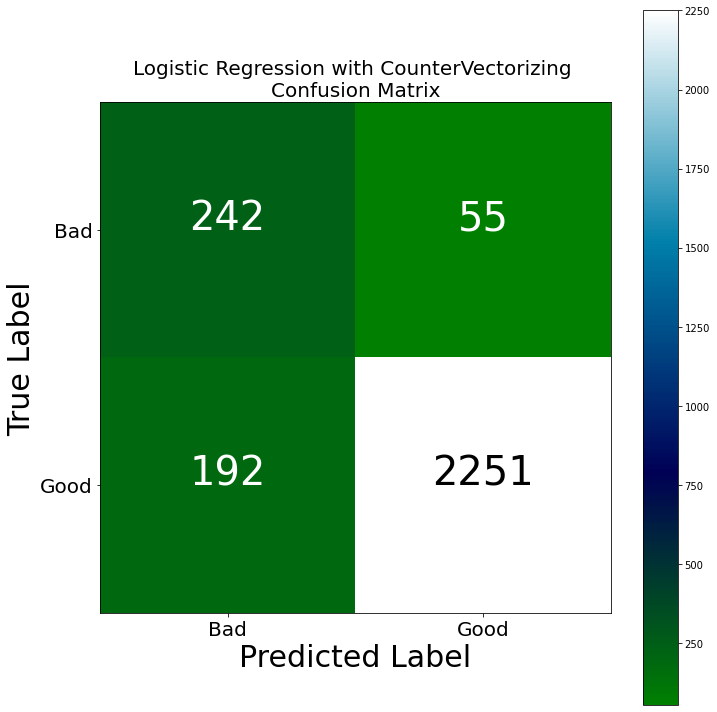

In [25]:
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 2)  Random Forest with CountVectorizer

In [26]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.9054122223109873


In [27]:
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.95      0.31      0.47       297
           1       0.92      1.00      0.96      2443

    accuracy                           0.92      2740
   macro avg       0.94      0.65      0.71      2740
weighted avg       0.93      0.92      0.91      2740



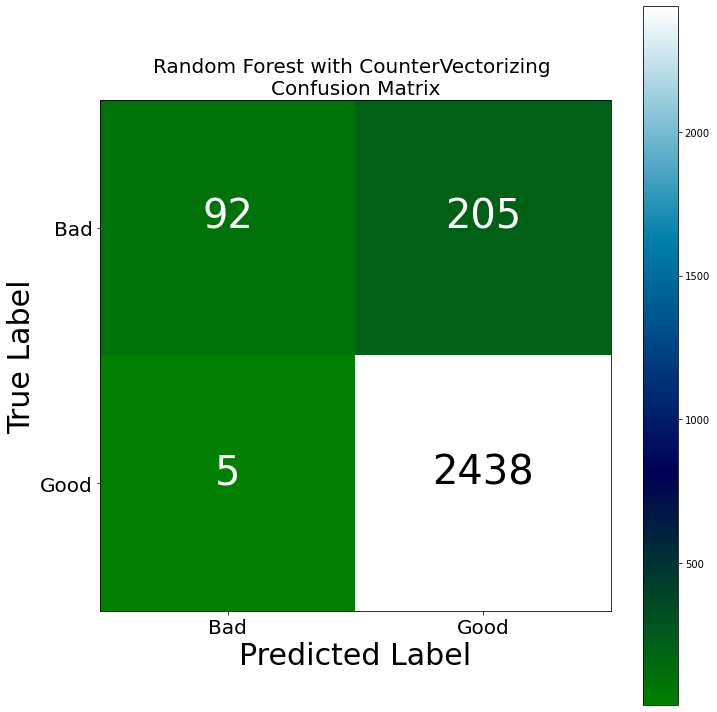

In [28]:
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 3)Naive Bayes with CountVectorizer

In [29]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.9277018951278979


In [30]:
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64       297
           1       0.95      0.98      0.96      2443

    accuracy                           0.93      2740
   macro avg       0.85      0.77      0.80      2740
weighted avg       0.93      0.93      0.93      2740



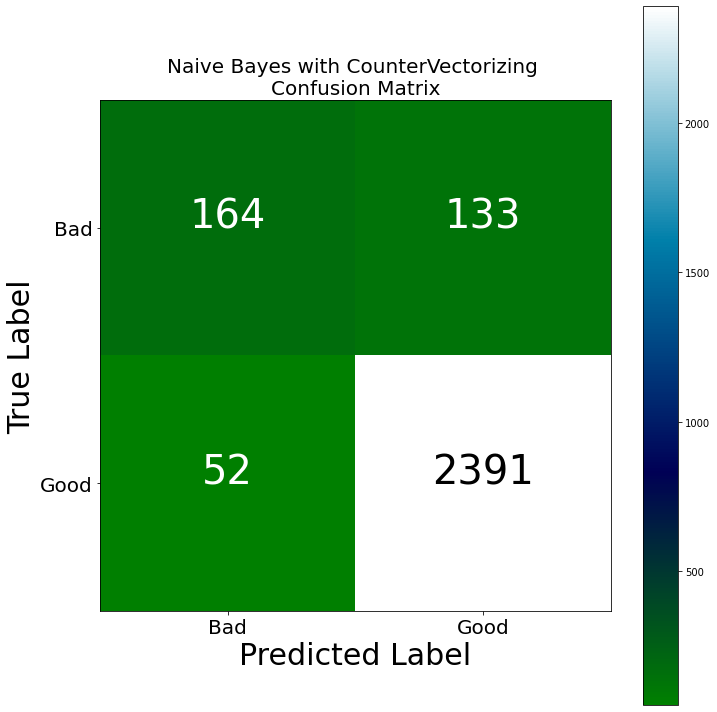

In [31]:
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

### 4) XGBoost with CountVectorizer


In [32]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

[10:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9362135245082137


In [33]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.80      0.60      0.68       297
           1       0.95      0.98      0.97      2443

    accuracy                           0.94      2740
   macro avg       0.88      0.79      0.83      2740
weighted avg       0.94      0.94      0.94      2740



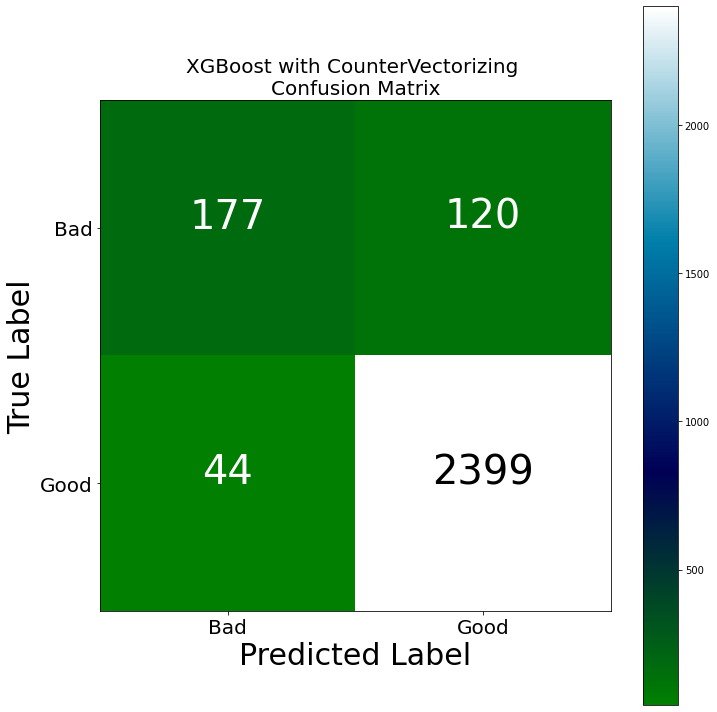

In [34]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 5) CatBoost with CountVectorizer


In [35]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.3073436	total: 121ms	remaining: 12s
1:	learn: 0.2786345	total: 160ms	remaining: 7.84s
2:	learn: 0.2673942	total: 197ms	remaining: 6.38s
3:	learn: 0.2539201	total: 236ms	remaining: 5.67s
4:	learn: 0.2433944	total: 271ms	remaining: 5.14s
5:	learn: 0.2373852	total: 309ms	remaining: 4.84s
6:	learn: 0.2327243	total: 352ms	remaining: 4.68s
7:	learn: 0.2303334	total: 392ms	remaining: 4.5s
8:	learn: 0.2247076	total: 427ms	remaining: 4.32s
9:	learn: 0.2211106	total: 459ms	remaining: 4.13s
10:	learn: 0.2172232	total: 495ms	remaining: 4s
11:	learn: 0.2150099	total: 536ms	remaining: 3.93s
12:	learn: 0.2054718	total: 571ms	remaining: 3.82s
13:	learn: 0.2020968	total: 604ms	remaining: 3.71s
14:	learn: 0.1999235	total: 637ms	remaining: 3.61s
15:	learn: 0.1977847	total: 670ms	remaining: 3.52s
16:	learn: 0.1946145	total: 704ms	remaining: 3.44s
17:	learn: 0.1916396	total: 746ms	remaining: 3.4s
18:	learn: 0.1904050	total: 793ms	remaining: 3.38s
19:	learn: 0.1888172	total: 831ms	remaining: 3.3

In [36]:
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.71      0.49      0.58       297
           1       0.94      0.98      0.96      2443

    accuracy                           0.92      2740
   macro avg       0.83      0.74      0.77      2740
weighted avg       0.92      0.92      0.92      2740



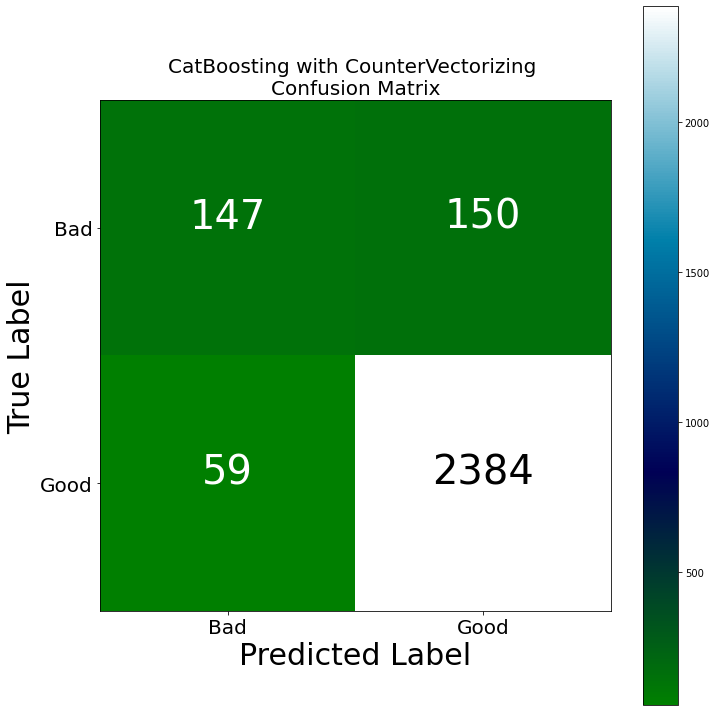

In [37]:
# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

### 6) Comparison of Models with CountVectorizer

In [38]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [39]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [40]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [41]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [42]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.909854 bad       0.557604  0.814815  0.662107   
                                  good      0.976149  0.921408  0.947989   
                                  average   0.930781  0.909854  0.917001   
           Random Forest 0.923358 bad       0.948454  0.309764  0.467005   
                                  good      0.922437  0.997953  0.958710   
                                  average   0.925257  0.923358  0.905412   
           Naive Bayes   0.932482 bad       0.759259  0.552189  0.639376   
                                  good      0.947306  0.978715  0.962754   
                                  average   0.926923  0.932482  0.927702   
           XGBoost       0.940146 bad       0.800905  0.595960  0.683398   
                                  good      0.952362  0.981989  0.966949   
                                  average   0.935945  0.940146  0.936214   
           CatBoost      0.923723 bad       0.713592  0.494949  0.584493   
                                  good      0.940805  0.975849  0.958007   
                                  average   0.916177  0.923723  0.917520   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.909854 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           Random Forest 0.923358 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           Naive Bayes   0.932482 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           XGBoost       0.940146 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           CatBoost      0.923723 bad        297.0  
                                  good      2443.0  
                                  average   2740.0

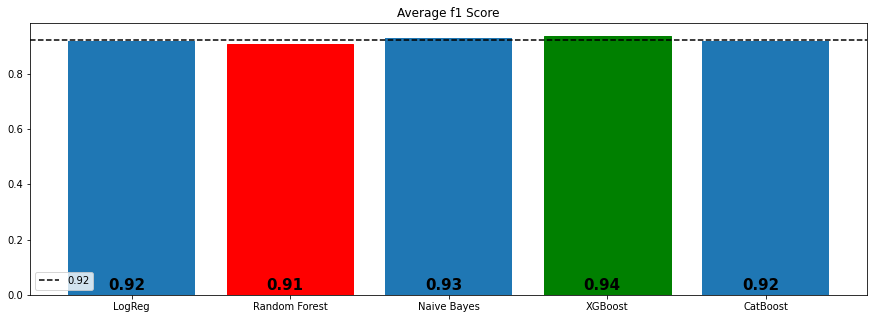

In [43]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

## 4.2 TF-IDF

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

In [44]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

### 4.2.1 Logistic Regression with TF-IDF

In [45]:

# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8901684118672474


In [46]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.46      0.91      0.61       297
           1       0.99      0.87      0.92      2443

    accuracy                           0.87      2740
   macro avg       0.72      0.89      0.77      2740
weighted avg       0.93      0.87      0.89      2740



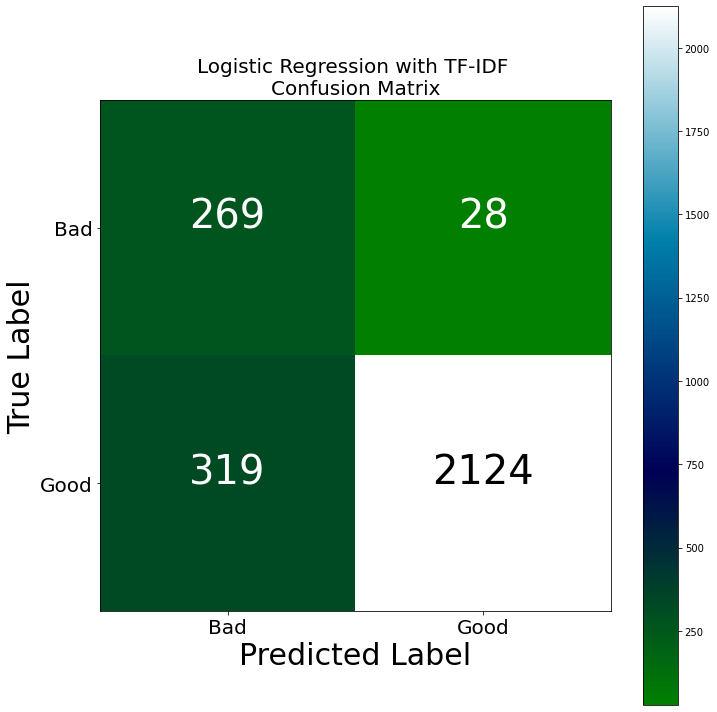

In [47]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

### 4.2.2 Random Forest with TF-IDF


In [48]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8944027746921542


In [49]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.96      0.25      0.39       297
           1       0.92      1.00      0.96      2443

    accuracy                           0.92      2740
   macro avg       0.94      0.62      0.67      2740
weighted avg       0.92      0.92      0.89      2740



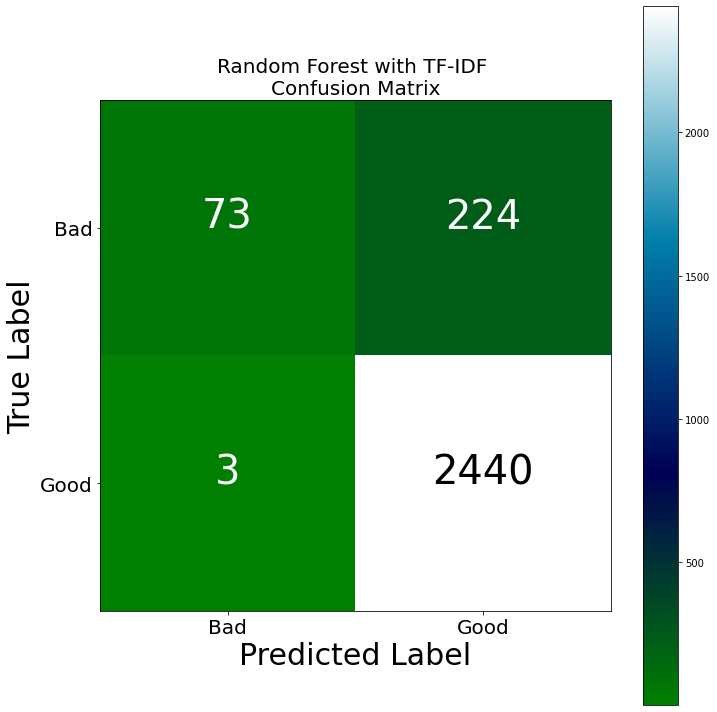

In [50]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

### 4.2.3 Naive Bayes with TF-IDF


In [51]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.8414040756941145


In [52]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       297
           1       0.89      1.00      0.94      2443

    accuracy                           0.89      2740
   macro avg       0.95      0.50      0.47      2740
weighted avg       0.90      0.89      0.84      2740



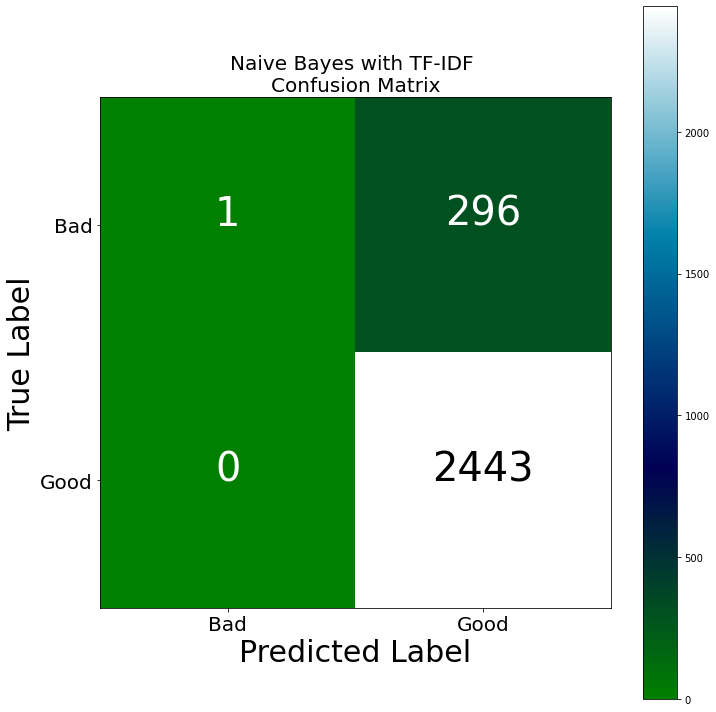

In [53]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

### 4.2.4 XGBoost with TF-IDF

In [54]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

[10:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9377692922031354


In [55]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       297
           1       0.95      0.98      0.97      2443

    accuracy                           0.94      2740
   macro avg       0.88      0.79      0.83      2740
weighted avg       0.94      0.94      0.94      2740



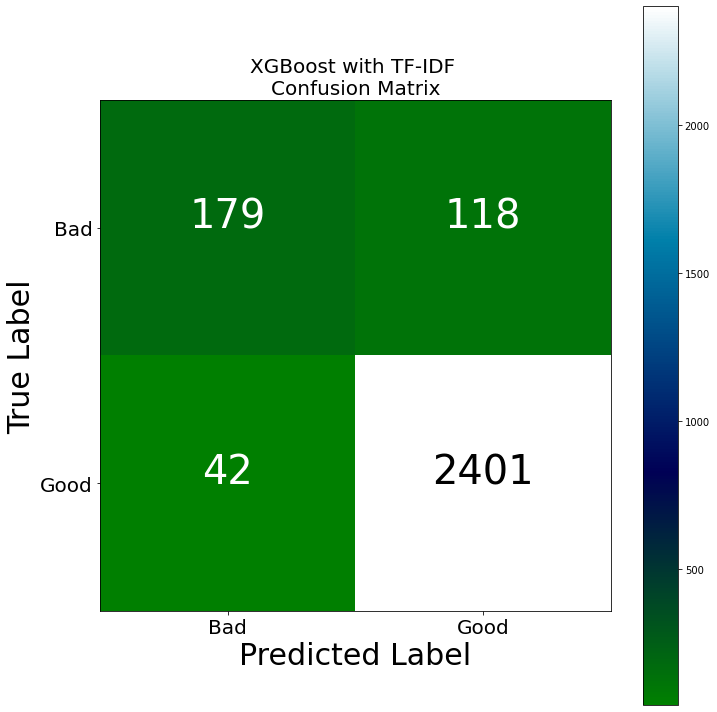

In [56]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

### 4.2.5 Catboost with TF-IDF

In [57]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.3518364	total: 46.4ms	remaining: 4.59s
1:	learn: 0.2836136	total: 79.1ms	remaining: 3.88s
2:	learn: 0.2709526	total: 111ms	remaining: 3.6s
3:	learn: 0.2546773	total: 150ms	remaining: 3.6s
4:	learn: 0.2459140	total: 192ms	remaining: 3.64s
5:	learn: 0.2390713	total: 236ms	remaining: 3.69s
6:	learn: 0.2332827	total: 286ms	remaining: 3.8s
7:	learn: 0.2283427	total: 329ms	remaining: 3.79s
8:	learn: 0.2240629	total: 369ms	remaining: 3.73s
9:	learn: 0.2195175	total: 409ms	remaining: 3.68s
10:	learn: 0.2163723	total: 451ms	remaining: 3.65s
11:	learn: 0.2096094	total: 492ms	remaining: 3.61s
12:	learn: 0.2028839	total: 536ms	remaining: 3.59s
13:	learn: 0.2000545	total: 582ms	remaining: 3.58s
14:	learn: 0.1985610	total: 623ms	remaining: 3.53s
15:	learn: 0.1963455	total: 669ms	remaining: 3.51s
16:	learn: 0.1941670	total: 716ms	remaining: 3.5s
17:	learn: 0.1920881	total: 760ms	remaining: 3.46s
18:	learn: 0.1900099	total: 807ms	remaining: 3.44s
19:	learn: 0.1878452	total: 848ms	remaining

In [58]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.76      0.52      0.62       297
           1       0.94      0.98      0.96      2443

    accuracy                           0.93      2740
   macro avg       0.85      0.75      0.79      2740
weighted avg       0.92      0.93      0.92      2740



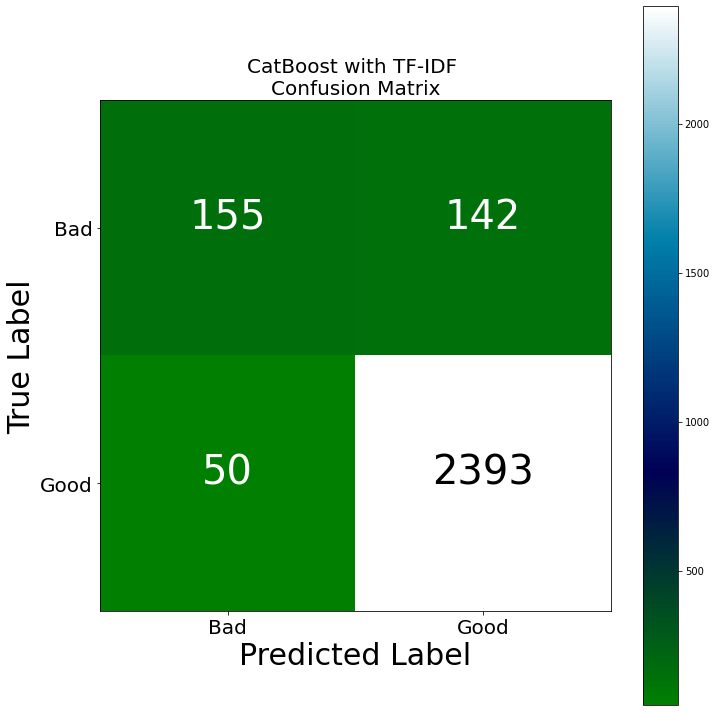

In [59]:
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

In [60]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [61]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.873358 bad       0.457483  0.905724  0.607910   
                                  good      0.986989  0.869423  0.924483   
                                  average   0.929594  0.873358  0.890168   
           Random Forest 0.917153 bad       0.960526  0.245791  0.391421   
                                  good      0.915916  0.998772  0.955551   
                                  average   0.920751  0.917153  0.894403   
           Naive Bayes   0.891971 bad       1.000000  0.003367  0.006711   
                                  good      0.891931  1.000000  0.942879   
                                  average   0.903645  0.891971  0.841404   
           XGBoost       0.941606 bad       0.809955  0.602694  0.691120   
                                  good      0.953156  0.982808  0.967755   
                                  average   0.937634  0.941606  0.937769   
           CatBoost      0.929927 bad       0.756098  0.521886  0.617530   
                                  good      0.943984  0.979533  0.961430   
                                  average   0.923618  0.929927  0.924153   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.873358 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           Random Forest 0.917153 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           Naive Bayes   0.891971 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           XGBoost       0.941606 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           CatBoost      0.929927 bad        297.0  
                                  good      2443.0  
                                  average   2740.0

#### Average f1 score - Models with TF-IDF Vectorizer


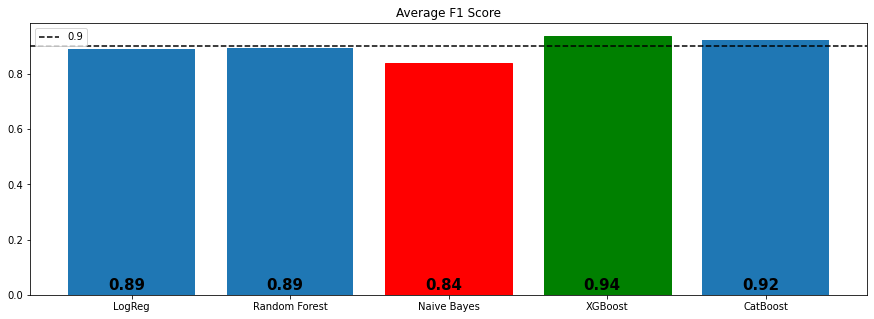

In [62]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

## 4.3 Hashing Vectorizer

Hash Vectorizer is designed to be as memory efficient as possible. Instead of storing the tokens as strings, the vectorizer applies the hashing trick to encode them as numerical indexes. The downside of this method is that once vectorized, the features’ names can no longer be retrieved.

In [63]:
# Create the word vector with Hash Vectorizer
hash_vect = HashingVectorizer(n_features=2000, ngram_range=(1,1),alternate_sign=False)
hash_vect_train = hash_vect.fit_transform(X_train)
hash_vect_train = hash_vect_train.toarray()
hash_vect_test = hash_vect.transform(X_test)
hash_vect_test = hash_vect_test.toarray()

## 4.3.1 Logistic Regression with Hash Vectorizer

In [64]:
# Call the modeling function for logistic regression with Hash Vectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_logreg = y_pred

f1 score: 0.866523371669991


In [65]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_logreg))

              precision    recall  f1-score   support

           0       0.40      0.86      0.54       297
           1       0.98      0.84      0.91      2443

    accuracy                           0.84      2740
   macro avg       0.69      0.85      0.72      2740
weighted avg       0.92      0.84      0.87      2740



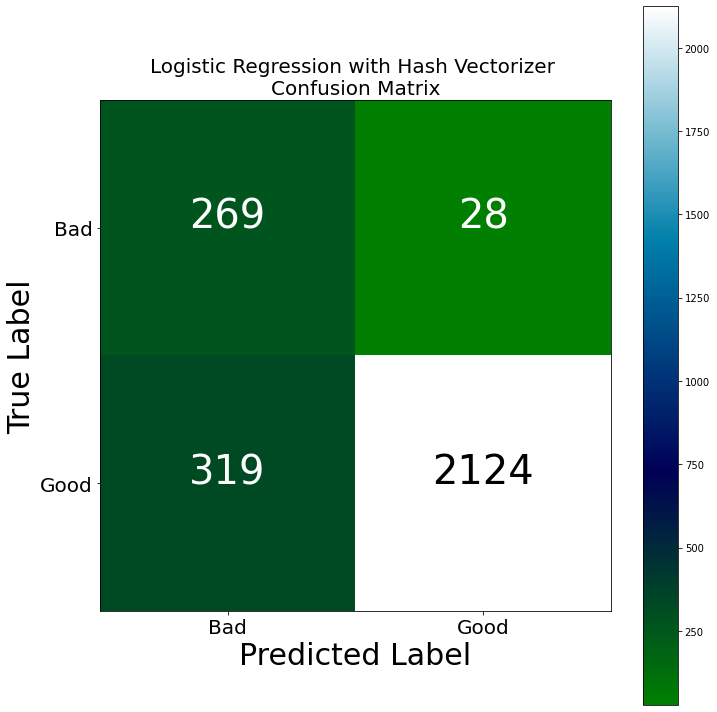

In [66]:
# Print confusion matrix for logistic regression with Hash Vectorizer
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "Hash Vectorizer")

## 4.3.2 Random Forest with Hash Vectorizer

In [67]:
# Call the modeling function for random forest classifier with Hash Vectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_rf = y_pred

f1 score: 0.9024585569725675


In [68]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_rf))

              precision    recall  f1-score   support

           0       0.99      0.29      0.44       297
           1       0.92      1.00      0.96      2443

    accuracy                           0.92      2740
   macro avg       0.95      0.64      0.70      2740
weighted avg       0.93      0.92      0.90      2740



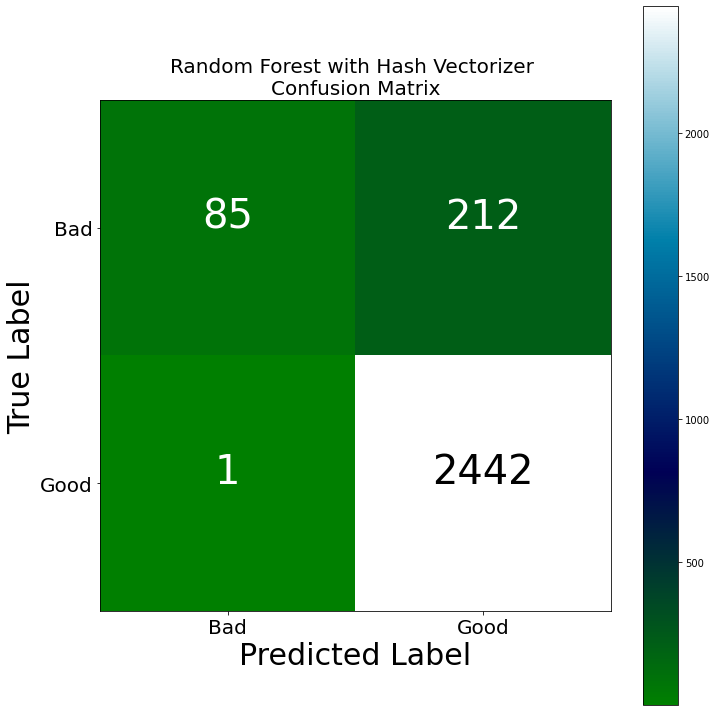

In [69]:
# Print confusion matrix for random forest classifier with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_rf, "Random Forest", "Hash Vectorizer")

## 4.3.3 Naive Bayes with Hash Vectorizer

In [70]:
# Call the modeling function for naive bayes with Hash Vectorizer and print f1 score
modeling(MultinomialNB(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_nb = y_pred

f1 score: 0.8479471962206054


In [71]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_nb))

              precision    recall  f1-score   support

           0       0.82      0.03      0.06       297
           1       0.89      1.00      0.94      2443

    accuracy                           0.89      2740
   macro avg       0.86      0.51      0.50      2740
weighted avg       0.89      0.89      0.85      2740



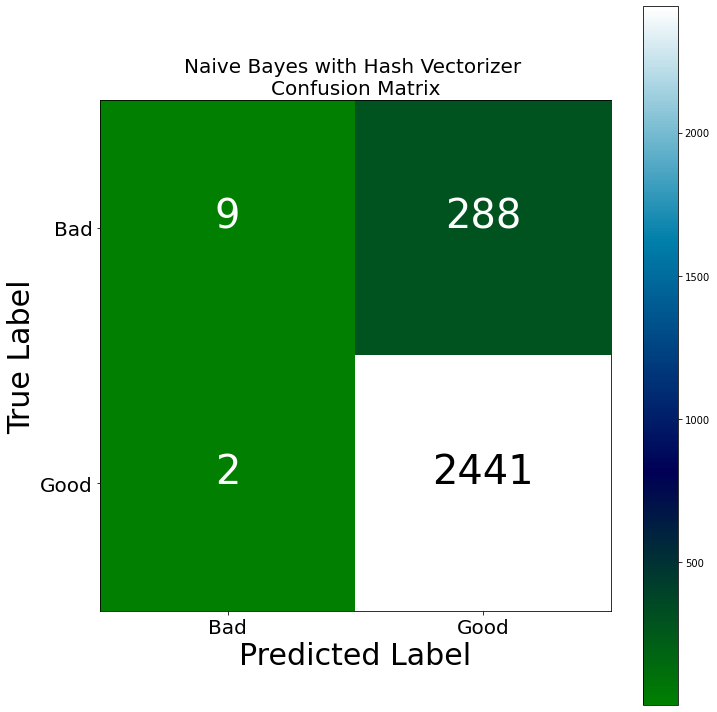

In [72]:
# Print confusion matrix for naive bayes with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_nb, "Naive Bayes", "Hash Vectorizer")

## 4.3.4 XGBoost with Hash Vectorize

In [73]:
# Call the modeling function for XGBoost with Hash Vectorizer and print f1 score
modeling(XGBClassifier(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_xgb = y_pred

[11:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9356413682539878


In [74]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_xgb))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68       297
           1       0.95      0.98      0.97      2443

    accuracy                           0.94      2740
   macro avg       0.88      0.79      0.82      2740
weighted avg       0.94      0.94      0.94      2740



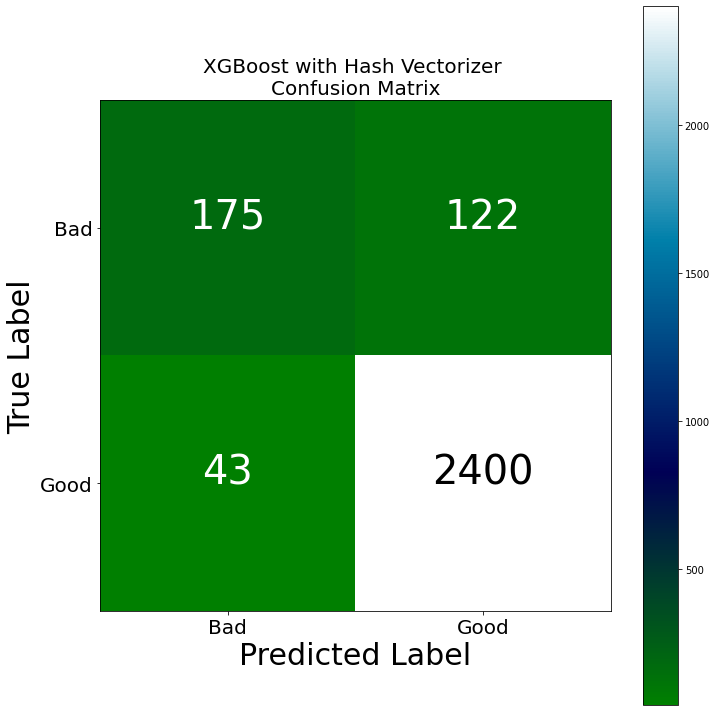

In [75]:
# Print confusion matrix for XGBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_xgb, "XGBoost", "Hash Vectorizer")

## 4.3.5 CatBoost with Hash Vectorizer

In [76]:
# Call the modeling function for Catboost with Hash Vectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_catboost = y_pred

0:	learn: 0.2866368	total: 26.4ms	remaining: 2.61s
1:	learn: 0.2653809	total: 46.3ms	remaining: 2.27s
2:	learn: 0.2560304	total: 65.5ms	remaining: 2.12s
3:	learn: 0.2492623	total: 87ms	remaining: 2.09s
4:	learn: 0.2405482	total: 106ms	remaining: 2.02s
5:	learn: 0.2360105	total: 125ms	remaining: 1.96s
6:	learn: 0.2278954	total: 144ms	remaining: 1.92s
7:	learn: 0.2219692	total: 163ms	remaining: 1.87s
8:	learn: 0.2177220	total: 185ms	remaining: 1.87s
9:	learn: 0.2144120	total: 207ms	remaining: 1.86s
10:	learn: 0.2090624	total: 236ms	remaining: 1.91s
11:	learn: 0.2046574	total: 264ms	remaining: 1.93s
12:	learn: 0.2001708	total: 286ms	remaining: 1.92s
13:	learn: 0.1969616	total: 313ms	remaining: 1.92s
14:	learn: 0.1947456	total: 334ms	remaining: 1.89s
15:	learn: 0.1926546	total: 354ms	remaining: 1.86s
16:	learn: 0.1908866	total: 373ms	remaining: 1.82s
17:	learn: 0.1877505	total: 392ms	remaining: 1.78s
18:	learn: 0.1863202	total: 411ms	remaining: 1.75s
19:	learn: 0.1847177	total: 430ms	remai

In [77]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_catboost))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       297
           1       0.94      0.97      0.96      2443

    accuracy                           0.92      2740
   macro avg       0.82      0.74      0.77      2740
weighted avg       0.92      0.92      0.92      2740



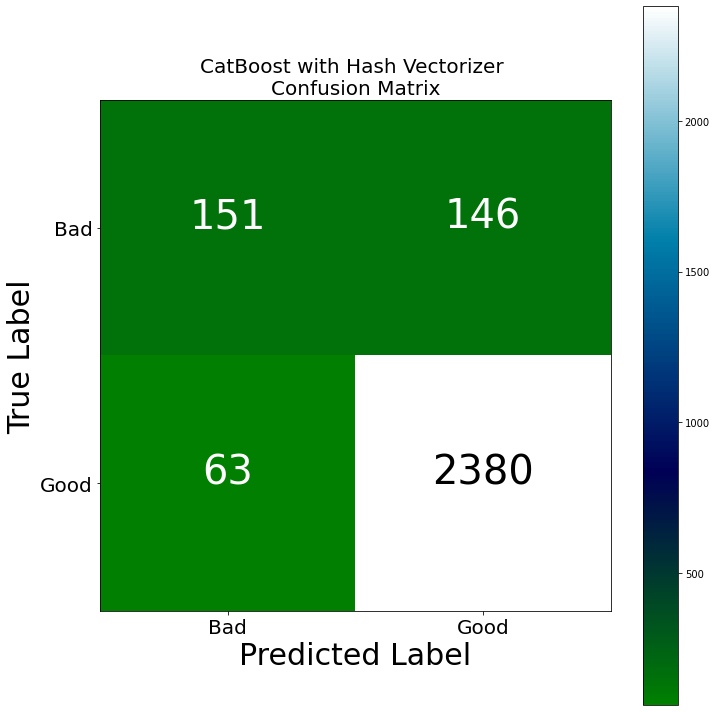

In [78]:
# Print confusion matrix for CatBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_catboost, "CatBoost", "Hash Vectorizer")

## 4.3.6 Comparison of Models with Hash Vectorizer

In [79]:
comparison_table(y_preds = [y_pred_hash_logreg, y_pred_hash_rf, y_pred_hash_nb, y_pred_hash_xgb, y_pred_hash_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [80]:
# Print the comparision matrix
print('\nComparision Matrix of Models with Hash Vectorizer\n')
df_tv2


Comparision Matrix of Models with Hash Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.843796 bad       0.397816  0.858586  0.543710   
                                  good      0.979990  0.841998  0.905768   
                                  average   0.916886  0.843796  0.866523   
           Random Forest 0.922263 bad       0.988372  0.286195  0.443864   
                                  good      0.920121  0.999591  0.958211   
                                  average   0.927519  0.922263  0.902459   
           Naive Bayes   0.894161 bad       0.818182  0.030303  0.058442   
                                  good      0.894467  0.999181  0.943929   
                                  average   0.886198  0.894161  0.847947   
           XGBoost       0.939781 bad       0.802752  0.589226  0.679612   
                                  good      0.951626  0.982399  0.966767   
                                  average   0.935489  0.939781  0.935641   
           CatBoost      0.923723 bad       0.705607  0.508418  0.590998   
                                  good      0.942201  0.974212  0.957939   
                                  average   0.916556  0.923723  0.918165   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.843796 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           Random Forest 0.922263 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           Naive Bayes   0.894161 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           XGBoost       0.939781 bad        297.0  
                                  good      2443.0  
                                  average   2740.0  
           CatBoost      0.923723 bad        297.0  
                                  good      2443.0  
                                  average   2740.0

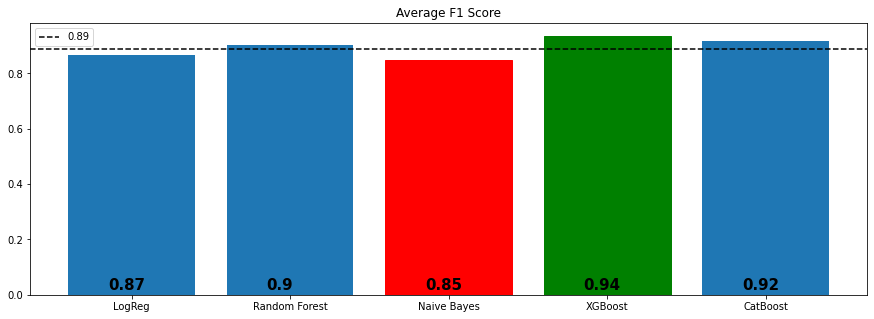

In [81]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")